<a href="https://colab.research.google.com/github/RajeshRamachander/tsnejaxproject/blob/main/tsnejax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iterations: 100%|██████████| 500/500 [00:00<00:00, 589.56it/s]


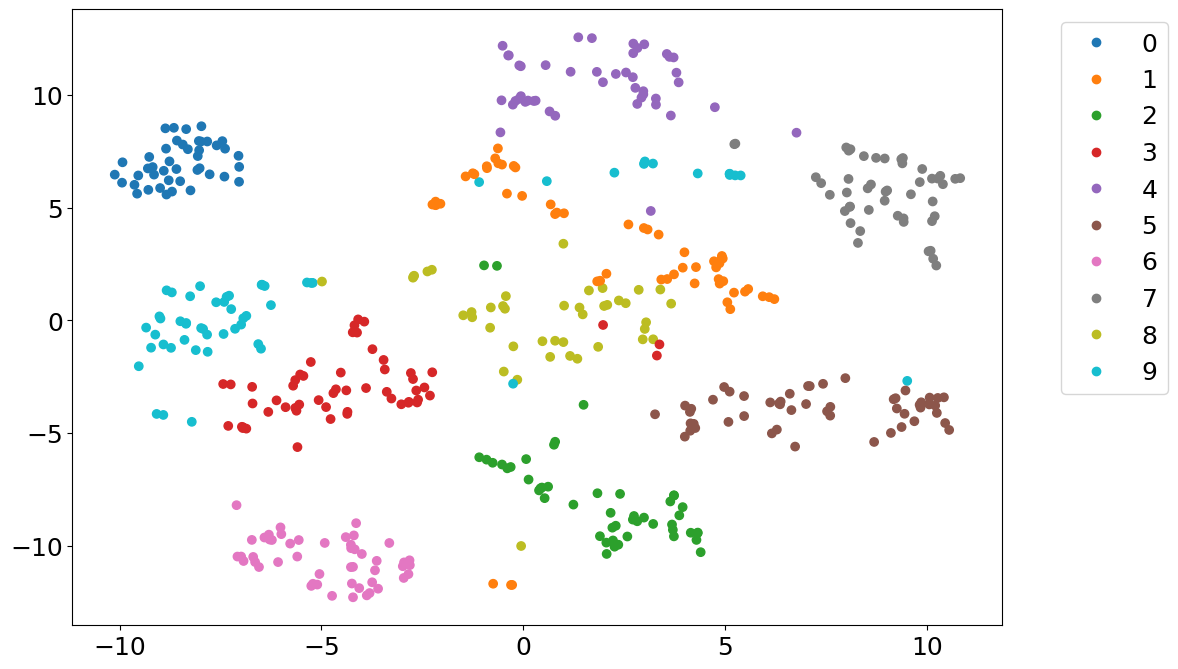

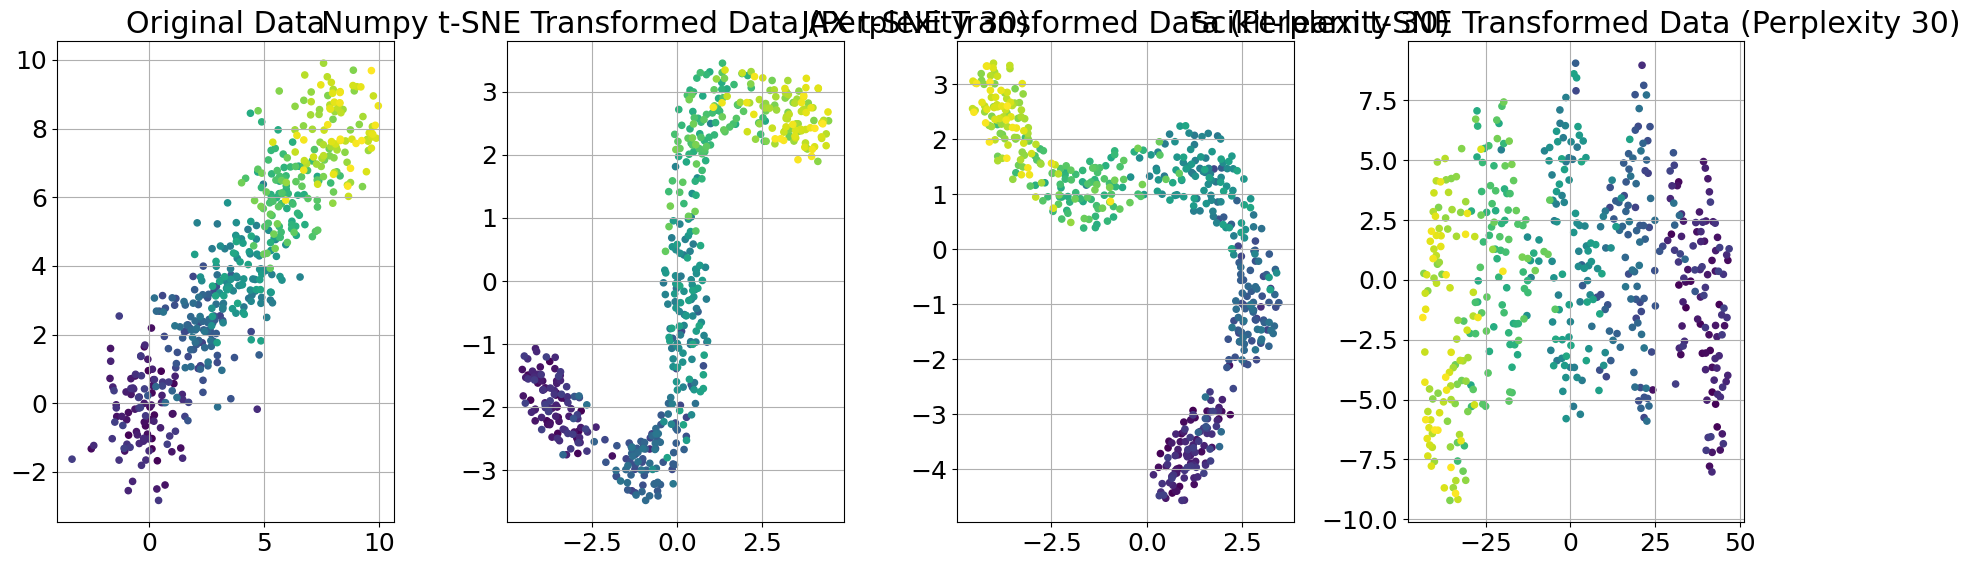

Custom t-SNE JAX Execution Time: 0.31023216247558594 seconds
Custom t-SNE Numpy Execution Time: 1.252553939819336 seconds
Scikit-learn t-SNE Execution Time: 1.4548451900482178 seconds


In [1]:
import tsnejax
import tsnenumpy
import time
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Define constant synthetic cluster data with more clusters
num_clusters = 5
cluster_size = 100
data = np.vstack([np.random.randn(cluster_size, 2) + i * 2 for i in range(num_clusters)])

# Best perplexity chosen from the previous hyperparameter search
best_perplexity = 30

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_jax = tsnejax.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_time = end_time_custom - start_time_custom

# Record the start time for the custom t-SNE implementation
start_time_custom = time.time()

# Compute low-dimensional embedding for the best perplexity
Y_custom_numpy = tsnenumpy.compute_low_dimensional_embedding(data, num_dimensions=2, target_perplexity=best_perplexity)

# Calculate the execution time for the custom t-SNE implementation
end_time_custom = time.time()
custom_tsne_numpy_time = end_time_custom - start_time_custom


# Record the start time for the scikit-learn t-SNE implementation
start_time_sklearn = time.time()

# Apply t-SNE using scikit-learn for comparison
tsne = TSNE(n_components=2, perplexity=best_perplexity, random_state=0)
Y_sklearn = tsne.fit_transform(data)

# Calculate the execution time for the scikit-learn t-SNE implementation
end_time_sklearn = time.time()
sklearn_tsne_time = end_time_sklearn - start_time_sklearn

# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot the original data
axes[0].scatter(data[:, 0], data[:, 1], 20, range(len(data)))
axes[0].set_title('Original Data')
axes[0].grid(True)

# Plot the jax t-SNE results with the best perplexity
axes[1].scatter(Y_custom_numpy[:, 0], Y_custom_numpy[:, 1], 20, range(len(Y_custom_numpy)))
axes[1].set_title(f'Numpy t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[1].grid(True)

# Plot the numpy t-SNE results with the best perplexity
axes[2].scatter(Y_custom_jax[:, 0], Y_custom_jax[:, 1], 20, range(len(Y_custom_jax)))
axes[2].set_title(f'JAX t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[2].grid(True)

# Plot scikit-learn t-SNE results with the same perplexity
axes[3].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], 20, range(len(Y_sklearn)))
axes[3].set_title(f'Scikit-learn t-SNE Transformed Data (Perplexity {best_perplexity})')
axes[3].grid(True)

# Display the subplots
plt.tight_layout()
plt.show()
# Print the execution times
print(f"Custom t-SNE JAX Execution Time: {custom_tsne_time} seconds")
print(f"Custom t-SNE Numpy Execution Time: {custom_tsne_numpy_time} seconds")
print(f"Scikit-learn t-SNE Execution Time: {sklearn_tsne_time} seconds")



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(1797, 64)


I0000 00:00:1700111795.575640       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
Iterations: 100%|██████████| 500/500 [00:00<00:00, 524.57it/s]


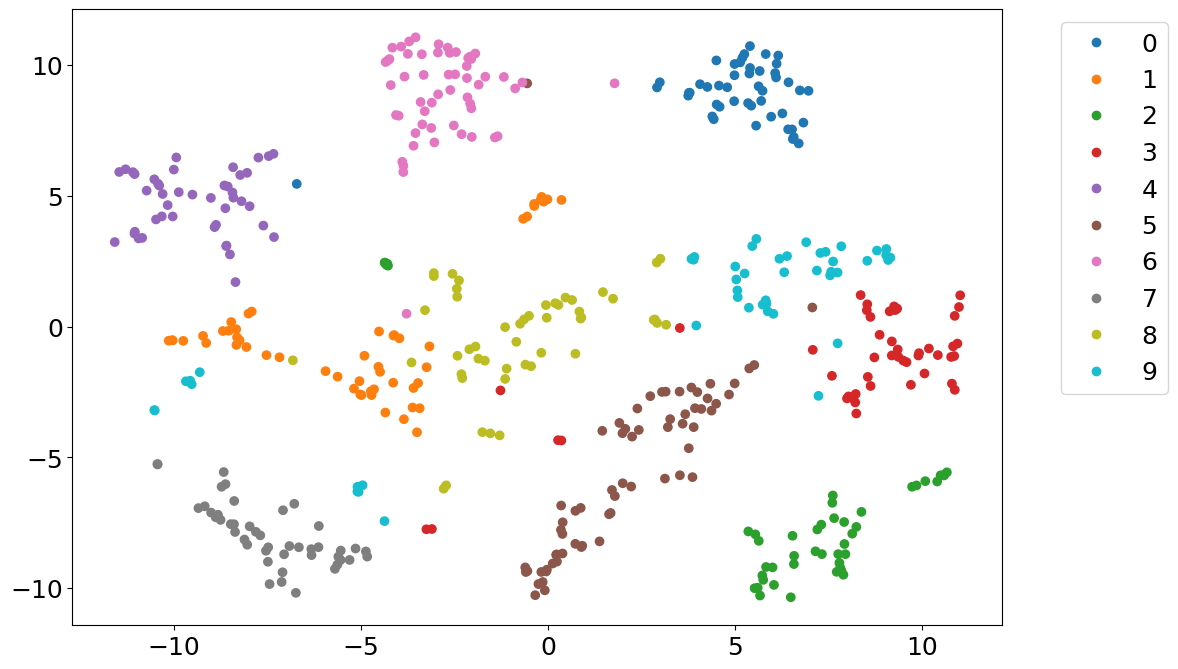

In [1]:

import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_digits
import numpy as np
import tsnejax

rcParams["font.size"] = 18
rcParams["figure.figsize"] = (12, 8)


digits, digit_class = load_digits(return_X_y=True)
print(digits.shape)
rand_idx = np.random.choice(np.arange(digits.shape[0]), size=500, replace=False)
data = digits[rand_idx, :].copy()
classes = digit_class[rand_idx]

low_dim = tsnejax.compute_low_dimensional_embedding(data, 2, 30, 500, 100, pbar=True)

scatter = plt.scatter(low_dim[:, 0], low_dim[:, 1], cmap="tab10", c=classes)
plt.legend(*scatter.legend_elements(), fancybox=True, bbox_to_anchor=(1.05, 1))
plt.show()

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_iris
import numpy as np
import tsnentk

rcParams["font.size"] = 18
rcParams["figure.figsize"] = (12, 8)

# Load Iris dataset
iris_data = load_iris()
data = iris_data.data
classes = iris_data.target

# Select a random subset of the data
rand_idx = np.random.choice(np.arange(data.shape[0]), size=150, replace=False)
data = data[rand_idx, :]
classes = classes[rand_idx]

# Compute the low-dimensional embedding
low_dim = tsnentk.compute_low_dimensional_embedding(data, 2, 30, 500, 100, pbar=True)

# Plotting
scatter = plt.scatter(low_dim[:, 0], low_dim[:, 1], cmap="tab10", c=classes)
plt.legend(*scatter.legend_elements(), fancybox=True, bbox_to_anchor=(1.05, 1))
plt.show()


AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

In [4]:
print(low_dim)

[[ 2.96024799e+00 -1.46824551e+00]
 [-8.12807369e+00 -7.71854258e+00]
 [-2.23226285e+00  1.37367213e+00]
 [-4.38055962e-01 -4.08590889e+00]
 [-5.29197454e+00  5.94927788e+00]
 [-3.25495839e+00 -1.13152018e+01]
 [-3.20616555e+00  2.66230136e-01]
 [-1.07756824e+01 -7.68614590e-01]
 [ 4.50814390e+00  3.42198610e+00]
 [-9.40509498e-01 -4.74474859e+00]
 [-2.37741351e+00  1.34485292e+01]
 [-4.24001408e+00 -3.50560045e+00]
 [ 4.88095903e+00 -8.29714203e+00]
 [ 2.80391979e+00 -6.62282085e+00]
 [-4.99773407e+00 -3.79542232e+00]
 [-5.82649112e-01  1.10873156e+01]
 [ 6.98332834e+00 -3.94481349e+00]
 [ 3.30255032e+00 -9.53908145e-01]
 [-2.15886045e+00  1.15440741e+01]
 [ 3.24054766e+00 -1.16670394e+00]
 [ 6.52741671e+00 -2.63461351e+00]
 [ 3.31389642e+00  4.78400564e+00]
 [-8.37684631e+00  5.89075518e+00]
 [ 8.08839035e+00  6.97063065e+00]
 [-7.74661541e+00 -8.14659977e+00]
 [-1.03957665e+00 -4.94336605e+00]
 [ 7.31455231e+00 -7.74714041e+00]
 [-3.21650338e+00 -8.93089485e+00]
 [ 1.43685138e+00 -1